In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [ ]:
from google.colab import files
files.upload()


Saving 1- mental-illnesses-prevalence.csv to 1- mental-illnesses-prevalence.csv


{'1- mental-illnesses-prevalence.csv': b"Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized\nAfghanistan,AFG,1990,0.22320578,4.996118,4.713314,0.70302314,0.12770003\nAfghanistan,AFG,1991,0.22245377,4.9892898,4.7021,0.7020688,0.123255946\nAfghanistan,AFG,1992,0.22175121,4.9813457,4.683743,0.700792,0.11884415\nAfghanistan,AFG,1993,0.22098725,4.9769583,4.6735487,0.70008695,0.11508888\nAfghanistan,AFG,1994,0.22018303,4.977782,4.67081,0.6998978,0.11181468\nAfghanistan,AFG,1995,0.2194088,4.978228,4.6681,0.6997684,0.10850699\nAfghanistan,AFG,1996,0.21846454,4.981489,4.6657586,0.6996502,0.10526882\nAfghanistan,AFG,1997,0.21728611,4.9875927,4.6650

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d imtkaggleteam/mental-health-eda-prediction


403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
!unzip mental-health-eda-prediction.zip


unzip:  cannot find or open mental-health-eda-prediction.zip, mental-health-eda-prediction.zip.zip or mental-health-eda-prediction.zip.ZIP.


In [ ]:
df = pd.read_csv("1- mental-illnesses-prevalence.csv")

In [ ]:
# check the first 5 rows of the dataset
df.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


# Data Cleaning

In [ ]:
# check the shape of the dataset
df.shape

(6420, 8)

In [ ]:
# check the data types of the columns
df.dtypes

Entity                                                                                object
Code                                                                                  object
Year                                                                                   int64
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    float64
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       float64
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           float64
dtype: object

In [ ]:
# check for missing values
df.isnull().sum()

Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64

In [ ]:
# drop the missing values
df.dropna(inplace=True)

In [ ]:
# check the shape of the dataset after dropping missing values
df.shape

(6150, 8)

# Exploratory Data Analysis

In [ ]:
# check the unique values in the 'Year' column
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
# check the unique values in the 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized' column
df['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].unique()

array([4.713314 , 4.7021   , 4.683743 , ..., 3.1884181, 3.172111 ,
       3.1370168])

# Data Visualization

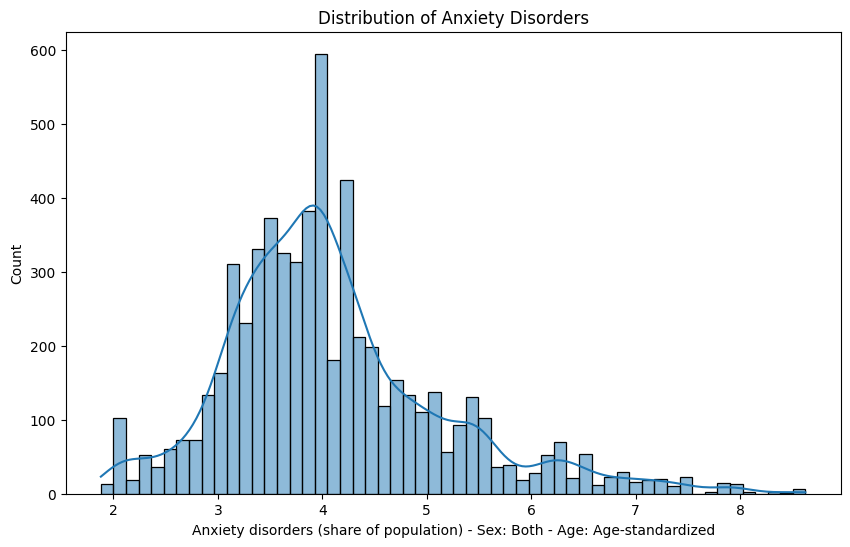

In [ ]:
# plot the distribution of the 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'], kde=True)
plt.title('Distribution of Anxiety Disorders')
plt.show()

In [ ]:
# Correlation

In [ ]:
# Drop the 'Entity' and 'Code' columns
df.drop(['Entity', 'Code'], axis=1, inplace=True)

In [ ]:
# check the correlation between the columns
df.corr()

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
Year,1.000000,0.025681,-0.048366,0.028779,0.002705,0.075643
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,0.025681,1.000000,-0.472859,0.294208,0.117661,0.495563
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,-0.048366,-0.472859,1.000000,0.120388,0.154509,-0.046099
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,0.028779,0.294208,0.120388,1.000000,0.569075,0.586784
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,0.002705,0.117661,0.154509,0.569075,1.000000,0.674967
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,0.075643,0.495563,-0.046099,0.586784,0.674967,1.000000


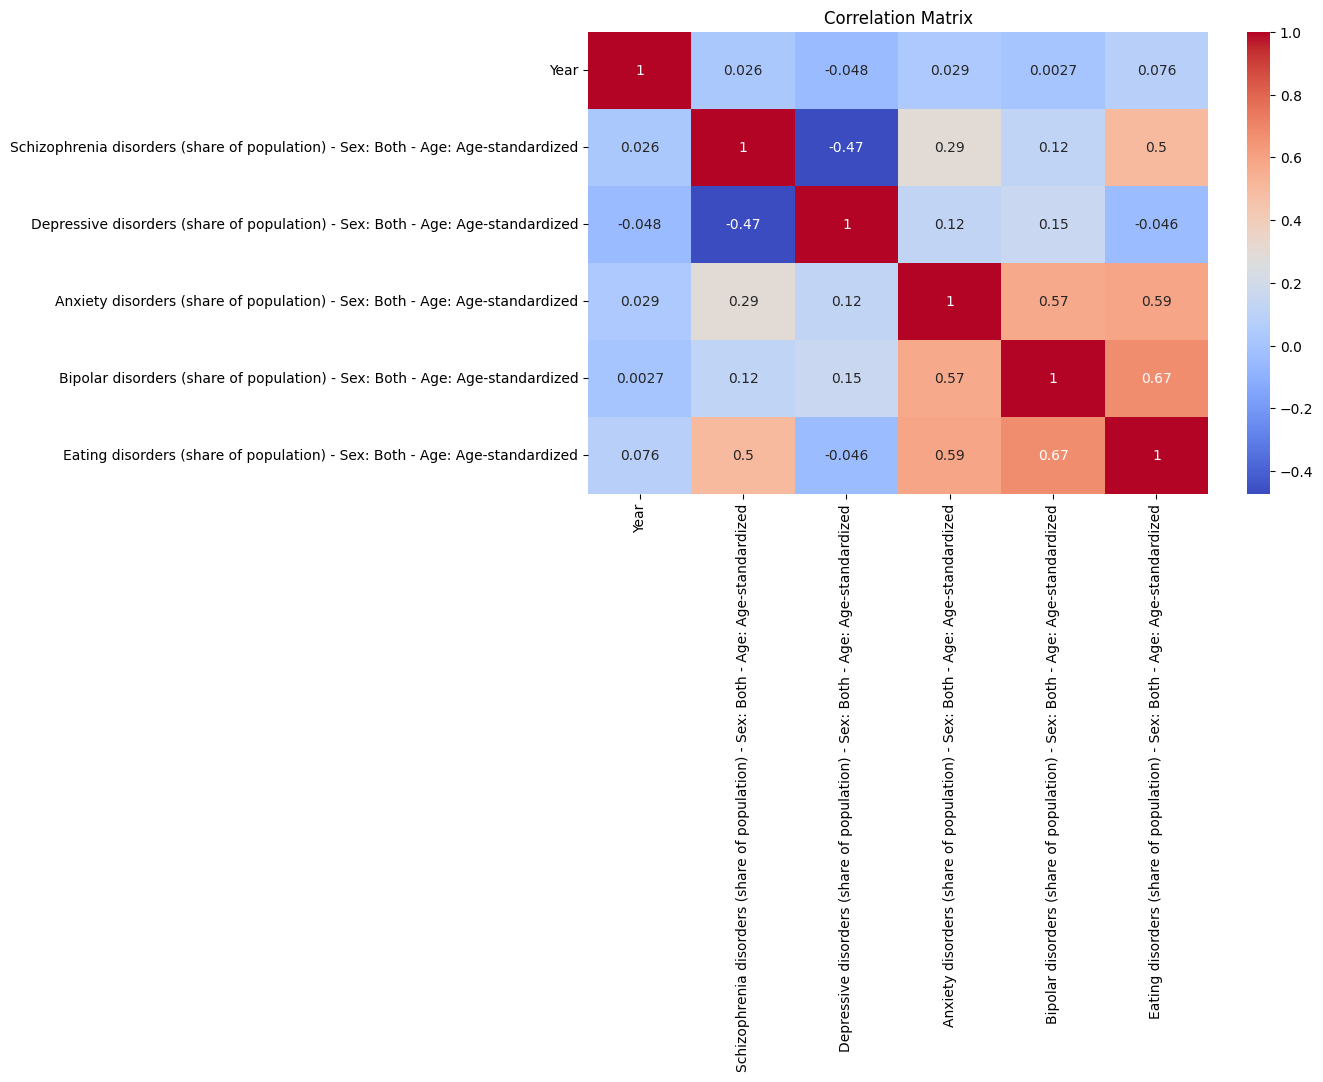

In [ ]:
# plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# check the correlation of the 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized column with other columns
df.corr()['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']

Year                                                                                 0.028779
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0.294208
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       0.120388
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          1.000000
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0.569075
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0.586784
Name: Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized, dtype: float64

In [ ]:
# Drop the columns with correlation less than 0.5 with the 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized' column
for col in df.columns:
    if df.corr()['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'][col] < 0.5:
        df.drop(col, axis=1, inplace=True)

# Machine Learning

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into features and target variable
X = df.drop('Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', axis=1)
y = df['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.6689129778596032


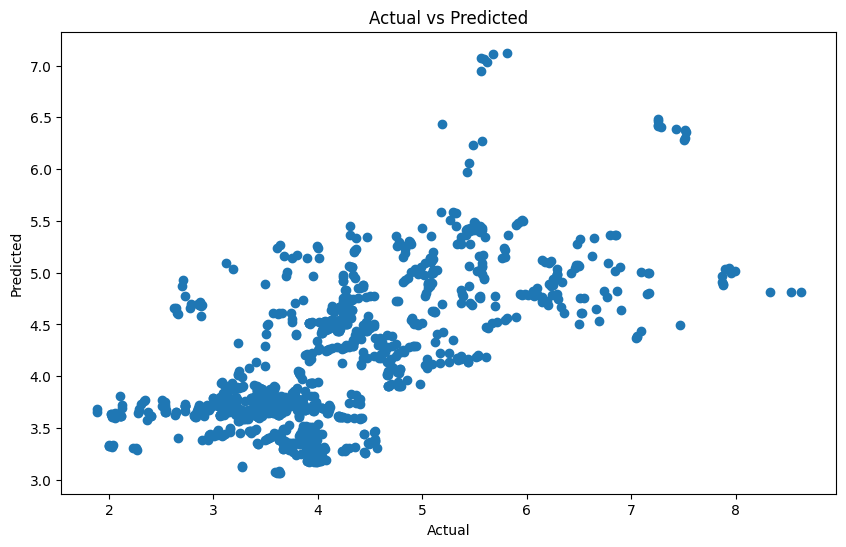

In [ ]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

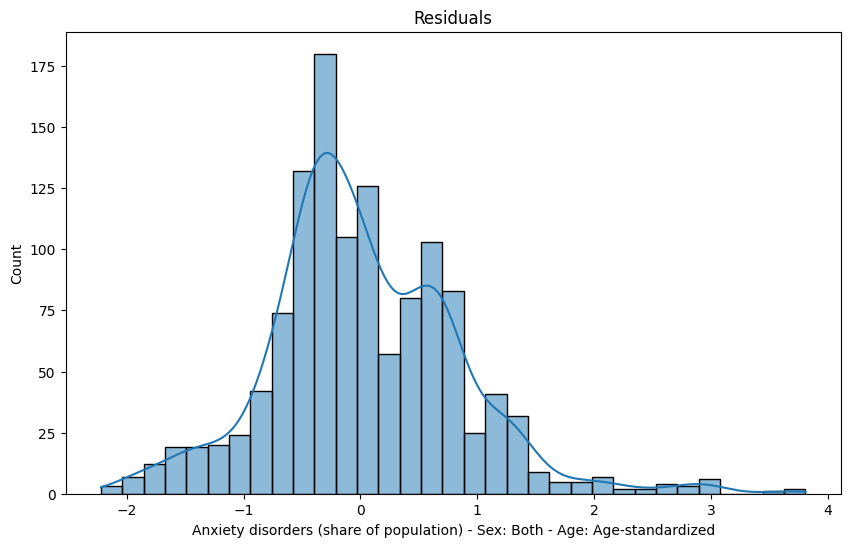

In [ ]:
# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('Residuals')
plt.show()

In [ ]:
# Check the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,1.441126
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,2.805520


In [ ]:
# Validate the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(scores)

-0.7062463999983046

In [ ]:
# Using R2 Score, Mean Absolute Error, Mean Squared Error and Root Mean Squared Error
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

R2 Score: 0.4225531080832805
Mean Absolute Error: 0.6169603306027168
Mean Squared Error: 0.6689129778596032
Root Mean Squared Error: 0.8178710031903584
